无监督数据压缩-主成分分析(Principal Component Analysis, PCA)
居于类别可分最大化的监督降维技术-线性判别分析(Linear Discriminant Analysis, LDA)
通过核主成分分析(Kernel principal component analysis)进行非线性降维

In [31]:
import pandas as pd

In [32]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [33]:
#对于主成分分析，必须先标准化
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [34]:
#构造协方差矩阵，协方差矩阵的特征向量代表主成分（最大方差方向），而对应的特征值大小就决定了特征向量的重要性
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n %s' % eigen_vals)


Eigenvalues 
 [ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


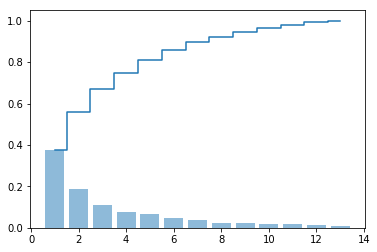

In [35]:
#绘制方差贡献率图像
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14),var_exp,alpha = 0.5,align='center')
plt.step(range(1,14),cum_var_exp,where='mid')
plt.show()

In [36]:
#特征转换
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
#选取2个对应特征值最大的特征向量
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
              eigen_pairs[1][1][:,np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [37]:
X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

In [38]:
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

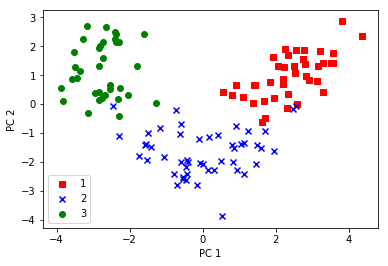

In [39]:
#将整个训练集转换为包含2个主成分的子空间
X_train_pca = X_train_std.dot(w)
#作图
colors = ['r','b','g']
markers = ['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
               X_train_pca[y_train==l,1],
               c=c,label=l,marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()


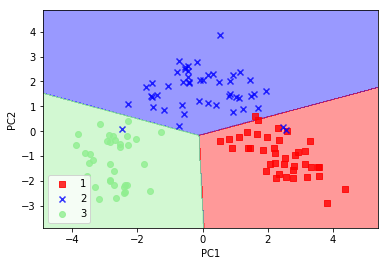

In [40]:
#使用sklearn进行pca分析
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max = X[:,0].min() -1, X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                   alpha = .8, c=cmap(idx),marker=markers[idx],label=cl)    

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

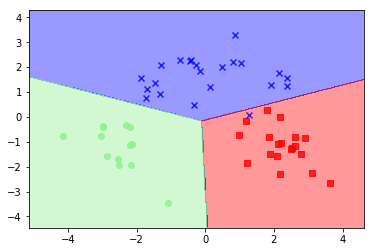

In [41]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.show()

In [42]:
#PCA的n_componets参数设为None，将返回按方差贡献率递减顺序的主成分,而不是进行降维操作
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

## LDA

LDA步骤
1.d维数据标准化<br>
2.对每一类别，计算d维的均值向量<br>
3.构造类间的散布矩阵S<sub>B</sub>以及类内的散步矩阵S<sub>W</sub><br>
4.计算矩阵S<sub>W</sub><sup>-1</sup>S<sub>B</sub>的特征值及对应的特征向量<br>
5.选取前k个特征值所对应的特征向量，构造一个dXk维的转换矩阵W，其中特征向量以列的形式排列
6.使用转换矩阵W将样本映射到新的特征子空间上

In [44]:
#计算均值
np.set_printoptions(precision=4)
mean_vecs=[]
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print('MV %s: %s\n' %(label,mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



计算类内散布矩阵S<sub>W</sub><br>
$$S_W=\sum_{i=1}^{c}S_i$$
其中，S<sub>i</sub>为各类别i的散布矩阵
$$S_i=\sum_{x\in D_i}^{c}(x-m_i)(x-m_i)^T$$

In [50]:
d=13 # number of features
S_W = np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X[y==label]:
        row, mv = row.reshape(d,1),mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter

print('Within-class scatter matrix: %sx%s',% (S_W.shape[0],S_W.shape[1]))

SyntaxError: invalid syntax (<ipython-input-50-90769e59af1a>, line 10)

省略，待补充……

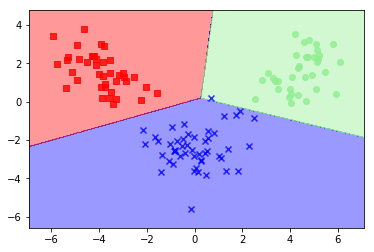

In [56]:
#sklearn进行LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y_train)
lr = LogisticRegression()
lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda,y_train,classifier=lr)
plt.show()

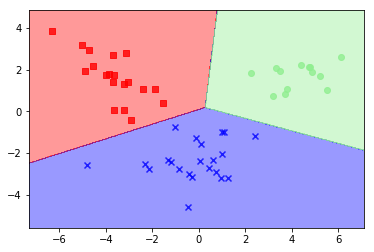

In [58]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda,y_test,classifier=lr)
plt.show()

### 使用核主成分分析进行非线性映射

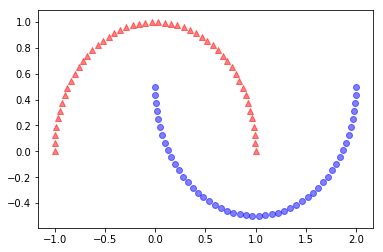

In [61]:
#构建半月形数据
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,random_state=123)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

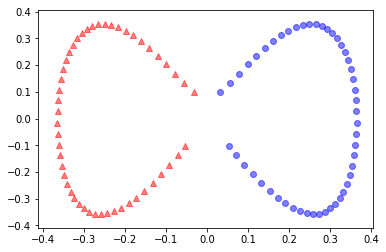

In [63]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2,kernel='rbf',gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()